In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import warnings;
warnings.filterwarnings("ignore")

In [118]:
df1=pd.read_excel('blore_2018.xlsx')

In [119]:
df1.head()

,From Date,To Date,BP,Benzene,MP-Xylene,O,Toluene,CO,Eth-Benzene,PM2.5,NO,NO2,NOx,Ozone,RH,SR,SO2,VWS,WD,WS
0,01-01-2018 00:00,01-01-2018 01:00,1010.3,None,None,None,NaN,1452.3,None,None,57.31,105.86,None,3.69,94.05,-99.99,3.53,-0.13,43.14,0.53
1,01-01-2018 01:00,01-01-2018 02:00,1010.3,None,None,None,NaN,1466.92,None,None,53.55,107.19,None,3.98,94.05,-99.99,3.17,-0.13,73.61,0.74
2,01-01-2018 02:00,01-01-2018 03:00,1010.3,None,None,None,NaN,1537.8,None,None,28.41,75.01,None,7.52,94.05,-99.99,3.01,-0.13,69.82,0.71
3,01-01-2018 03:00,01-01-2018 04:00,1010.3,None,None,None,NaN,1438.1,None,None,16.79,51.3,None,15.63,94.06,-99.99,3.6,-0.13,172.13,0.52
4,01-01-2018 04:00,01-01-2018 05:00,1010.3,None,None,None,NaN,1414.3,None,None,10.64,37.84,None,43.59,81.61,-99.99,3.4,-0.13,212.24,0.28


In [120]:
df=df1[['From Date','BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']]

In [121]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2018 00:00,1010.3,1452.3,-0.13,43.14,0.53,57.31,105.86,None,94.05,3.53,-99.99
1,01-01-2018 01:00,1010.3,1466.92,-0.13,73.61,0.74,53.55,107.19,None,94.05,3.17,-99.99
2,01-01-2018 02:00,1010.3,1537.8,-0.13,69.82,0.71,28.41,75.01,None,94.05,3.01,-99.99
3,01-01-2018 03:00,1010.3,1438.1,-0.13,172.13,0.52,16.79,51.3,None,94.06,3.6,-99.99
4,01-01-2018 04:00,1010.3,1414.3,-0.13,212.24,0.28,10.64,37.84,None,81.61,3.4,-99.99


In [122]:
df.shape

(8737, 12)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 12 columns):
From Date    8737 non-null object
BP           8737 non-null object
CO           8737 non-null object
VWS          8737 non-null object
WD           8737 non-null object
WS           8737 non-null object
NO           8737 non-null object
NO2          8737 non-null object
PM2.5        8737 non-null object
RH           8737 non-null object
SO2          8737 non-null object
SR           8737 non-null object
dtypes: object(12)
memory usage: 819.2+ KB


In [124]:
for i in df.columns:
    for j in df[i]:
        if(j=='None'):
            df[i]=df[i].replace(j,np.nan)

In [125]:
print("Percentage of Null values in Banglaore 2018: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Banglaore 2018:  16.571286864293615


In [126]:
df.isna().sum()

From Date       0
BP            949
CO           1018
VWS           944
WD            949
WS            944
NO            954
NO2           955
PM2.5        1005
RH           7580
SO2          1131
SR            945
dtype: int64

In [127]:
list1=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
count=0
for i in list1:
    for j in df[i]:
        if(j<0):
            count=count+1

In [128]:
count/(len(df)*12)

0.05500553202853763

In [129]:
for col in list1:
    if(col!='VWS'):
        for j in df[col]:
            if(j<0):
                df[col]=df[col].replace(j,np.nan)

In [130]:
print("Percentage of Null values in Bangalore 2018: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Bangalore 2018:  17.568005799091985


In [131]:
df.isna().sum()

From Date       0
BP            949
CO           1018
VWS           944
WD            949
WS            944
NO            954
NO2           955
PM2.5        1005
RH           7580
SO2          1131
SR           1990
dtype: int64

In [132]:
df=df.dropna(axis=0,subset=['PM2.5'])

In [133]:
m=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
for col in m:
    df[col] = df[col].interpolate(method='nearest',limit_direction = 'both')

In [134]:
df.isna().sum()

From Date       0
BP              0
CO              0
VWS             0
WD              0
WS              0
NO              0
NO2             0
PM2.5           0
RH           6609
SO2             0
SR            963
dtype: int64

In [135]:
df['RH'].replace(np.nan,df['RH'].mean(),inplace=True)
df['SR'].replace(np.nan,df['SR'].mean(),inplace=True)

In [136]:
df.isna().sum()

From Date    0
BP           0
CO           0
VWS          0
WD           0
WS           0
NO           0
NO2          0
PM2.5        0
RH           0
SO2          0
SR           0
dtype: int64

In [137]:
df['BP']=df['BP'].astype(float)
df['CO']=df['CO'].astype(float)
df['VWS']=df['VWS'].astype(float)
df['WD']=df['WD'].astype(float)
df['WS']=df['WS'].astype(float)
df['NO']=df['NO'].astype(float)
df['NO2']=df['NO2'].astype(float)
df['PM2.5']=df['PM2.5'].astype(float)
df['RH']=df['RH'].astype(float)
df['SO2']=df['SO2'].astype(float)
df['SR']=df['SR'].astype(float)

In [138]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
14,01-01-2018 14:00,1010.38,1323.73,-0.13,101.78,0.50,0.11,20.64,8.00,32.38,2.69,153.870409
15,01-01-2018 15:00,1010.75,1604.50,-0.12,233.44,0.56,0.11,18.24,13.00,30.95,4.12,153.870409
16,01-01-2018 16:00,1010.37,1273.05,-0.13,228.97,0.59,0.23,19.75,27.07,31.94,4.85,153.870409
17,01-01-2018 17:00,1010.30,1471.65,-0.13,240.37,0.71,0.91,23.66,32.59,33.77,3.62,153.870409
18,01-01-2018 18:00,1010.30,2622.27,-0.13,102.74,0.66,22.73,88.78,35.67,44.95,4.11,153.870409


In [139]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000
mean,1006.829161,186.202256,-0.030731,151.638389,0.785565,6.232469,20.830297,27.658989,59.565102,3.411352,153.870409
std,50.130135,500.969808,0.082942,86.284371,0.143702,12.347712,23.620826,33.350863,11.314756,5.168322,226.305887
min,0.000000,0.000000,-0.620000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000,0.000000,0.000000
25%,1006.515000,0.750000,-0.120000,72.857500,0.720000,0.000000,0.000000,14.267500,59.565102,0.000000,7.130000
50%,1010.300000,0.830000,-0.040000,104.280000,0.810000,4.390000,16.280000,20.715000,59.565102,3.410000,17.220000
75%,1011.070000,1.410000,0.030000,244.562500,0.890000,6.660000,26.090000,32.210000,59.565102,4.490000,168.820000
max,1029.950000,5363.250000,0.260000,351.070000,1.120000,221.390000,217.740000,999.990000,104.080000,64.200000,999.990000


In [140]:
df['CO'][(df['CO']>10) & (df['CO']<100)]

284    45.55
Name: CO, dtype: float64

In [141]:
df['CO'] = np.where((df.CO >100),df['CO']/1000,df.CO)


In [142]:
df.isna().sum()

From Date    0
BP           0
CO           0
VWS          0
WD           0
WS           0
NO           0
NO2          0
PM2.5        0
RH           0
SO2          0
SR           0
dtype: int64

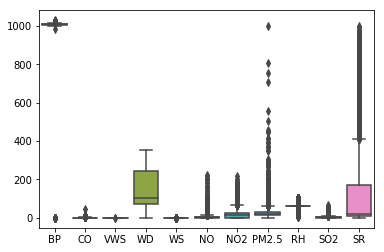

In [143]:
sns.boxplot(data=df)

In [144]:
df.shape

(7732, 12)

In [145]:
df['location']=4
df['location']=df['location'].astype('category')

In [146]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR,location
14,01-01-2018 14:00,1010.38,1.32373,-0.13,101.78,0.50,0.11,20.64,8.00,32.38,2.69,153.870409,4
15,01-01-2018 15:00,1010.75,1.60450,-0.12,233.44,0.56,0.11,18.24,13.00,30.95,4.12,153.870409,4
16,01-01-2018 16:00,1010.37,1.27305,-0.13,228.97,0.59,0.23,19.75,27.07,31.94,4.85,153.870409,4
17,01-01-2018 17:00,1010.30,1.47165,-0.13,240.37,0.71,0.91,23.66,32.59,33.77,3.62,153.870409,4
18,01-01-2018 18:00,1010.30,2.62227,-0.13,102.74,0.66,22.73,88.78,35.67,44.95,4.11,153.870409,4


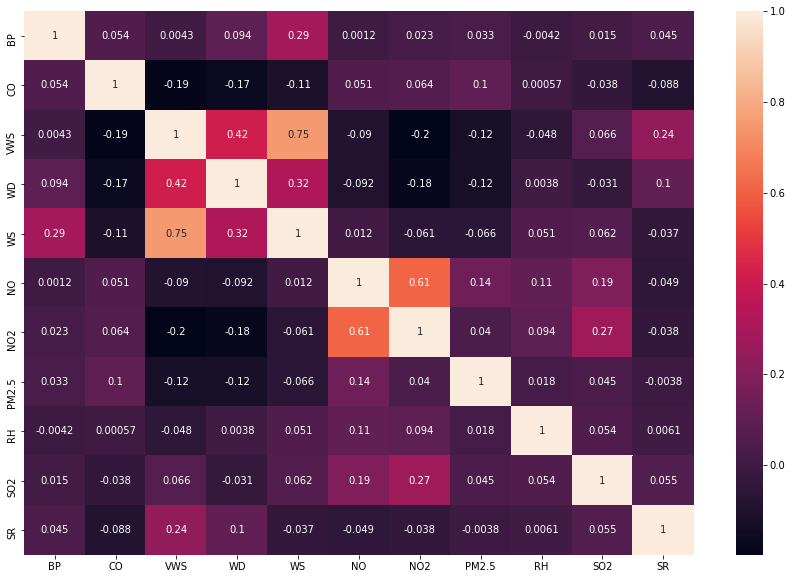

In [147]:
m=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(m,annot=True)

In [148]:
df.columns

Index(['From Date', 'BP', 'CO', 'VWS', 'WD', 'WS', 'NO', 'NO2', 'PM2.5', 'RH',
       'SO2', 'SR', 'location'],
      dtype='object')

In [149]:
"""iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)
up_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)
low_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)

iqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)
up_co=df['CO'].quantile(.75)+(1.5*iqr_co)
low_co=df['CO'].quantile(.25)-(1.5*iqr_co)

iqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)
up_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)
low_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)


iqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)
up_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)
low_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)


iqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)
up_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)
low_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)

iqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)
up_no=df['NO'].quantile(.75)+(1.5*iqr_no)
low_no=df['NO'].quantile(.25)-(1.5*iqr_no)

iqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)
up_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)
low_no2=df['NO2'].quantile(.25)-(1.5*iqr_no2)


iqr_pm=df['PM2.5'].quantile(.75)-df['PM2.5'].quantile(.25)
up_pm=df['PM2.5'].quantile(.75)+(1.5*iqr_pm)
low_pm=df['PM2.5'].quantile(.25)-(1.5*iqr_pm)

iqr_rh=df['RH'].quantile(.75)-df['RH'].quantile(.25)
up_rh=df['RH'].quantile(.75)+(1.5*iqr_rh)
low_rh=df['RH'].quantile(.25)-(1.5*iqr_rh)

iqr_so2=df['SO2'].quantile(.75)-df['SO2'].quantile(.25)
up_so2=df['SO2'].quantile(.75)+(1.5*iqr_so2)
low_so2=df['SO2'].quantile(.25)-(1.5*iqr_so2)

iqr_sr=df['SR'].quantile(.75)-df['SR'].quantile(.25)
up_sr=df['SR'].quantile(.75)+(1.5*iqr_sr)
low_sr=df['SR'].quantile(.25)-(1.5*iqr_sr)
"""

"iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)\nup_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)\nlow_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)\n\niqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)\nup_co=df['CO'].quantile(.75)+(1.5*iqr_co)\nlow_co=df['CO'].quantile(.25)-(1.5*iqr_co)\n\niqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)\nup_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)\nlow_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)\n\n\niqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)\nup_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)\nlow_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)\n\n\niqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)\nup_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)\nlow_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)\n\niqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)\nup_no=df['NO'].quantile(.75)+(1.5*iqr_no)\nlow_no=df['NO'].quantile(.25)-(1.5*iqr_no)\n\niqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)\nup_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)\nlow_no2=df['NO2'].quantil

In [150]:
"""for i in df['CO']:
    if(i>up_co):
        df['CO']=df['CO'].replace(i,up_co)

for i in df['NO2']:
    if(i>up_no2):
        df['NO2']=df['NO2'].replace(i,up_no2)
for i in df['NO']:
    if(i>up_no):
        df['NO']=df['NO'].replace(i,up_no)

for i in df['SO2']:
    if(i>up_so2):
        df['SO2']=df['SO2'].replace(i,up_so2)
        
for i in df['RH']:
    if(i>up_rh):
        df['RH']=df['RH'].replace(i,up_rh)
        
for i in df['VWS']:
    if(i>up_vws):
        df['VWS']=df['VWS'].replace(i,up_vws)
        
for i in df['WS']:
    if(i>up_ws):
        df['WS']=df['WS'].replace(i,up_ws)
        
for i in df['WD']:
    if(i>up_wd):
        df['WD']=df['WD'].replace(i,up_wd)
        
for i in df['PM2.5']:
    if(i>up_pm):
        df['PM2.5']=df['PM2.5'].replace(i,up_pm)
        
for i in df['SR']:
    if(i>up_sr):
        df['SR']=df['SR'].replace(i,up_sr)

for i in df['BP']:
    if(i<low_bp):
        df['BP']=df['BP'].replace(i,low_bp)
    elif(i>up_bp):
        df['BP']=df['BP'].replace(i,up_bp)"""

"for i in df['CO']:\n    if(i>up_co):\n        df['CO']=df['CO'].replace(i,up_co)\n\nfor i in df['NO2']:\n    if(i>up_no2):\n        df['NO2']=df['NO2'].replace(i,up_no2)\nfor i in df['NO']:\n    if(i>up_no):\n        df['NO']=df['NO'].replace(i,up_no)\n\nfor i in df['SO2']:\n    if(i>up_so2):\n        df['SO2']=df['SO2'].replace(i,up_so2)\n        \nfor i in df['RH']:\n    if(i>up_rh):\n        df['RH']=df['RH'].replace(i,up_rh)\n        \nfor i in df['VWS']:\n    if(i>up_vws):\n        df['VWS']=df['VWS'].replace(i,up_vws)\n        \nfor i in df['WS']:\n    if(i>up_ws):\n        df['WS']=df['WS'].replace(i,up_ws)\n        \nfor i in df['WD']:\n    if(i>up_wd):\n        df['WD']=df['WD'].replace(i,up_wd)\n        \nfor i in df['PM2.5']:\n    if(i>up_pm):\n        df['PM2.5']=df['PM2.5'].replace(i,up_pm)\n        \nfor i in df['SR']:\n    if(i>up_sr):\n        df['SR']=df['SR'].replace(i,up_sr)\n\nfor i in df['BP']:\n    if(i<low_bp):\n        df['BP']=df['BP'].replace(i,low_bp)\n    e

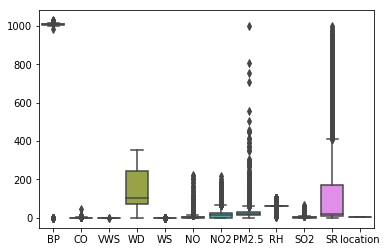

In [151]:
sns.boxplot(data=df)

In [152]:
result_csv1 = df.to_csv (r'C:\dse_new\eda_blore_18.csv', index = None, header=True)

# Upto this basic EDA is done

# ---------------------------------------------------------------------------------------------------------------

In [153]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000,7732.000000
mean,1006.829161,1.116947,-0.030731,151.638389,0.785565,6.232469,20.830297,27.658989,59.565102,3.411352,153.870409
std,50.130135,1.130455,0.082942,86.284371,0.143702,12.347712,23.620826,33.350863,11.314756,5.168322,226.305887
min,0.000000,0.000000,-0.620000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000,0.000000,0.000000
25%,1006.515000,0.750000,-0.120000,72.857500,0.720000,0.000000,0.000000,14.267500,59.565102,0.000000,7.130000
50%,1010.300000,0.830000,-0.040000,104.280000,0.810000,4.390000,16.280000,20.715000,59.565102,3.410000,17.220000
75%,1011.070000,1.340000,0.030000,244.562500,0.890000,6.660000,26.090000,32.210000,59.565102,4.490000,168.820000
max,1029.950000,45.550000,0.260000,351.070000,1.120000,221.390000,217.740000,999.990000,104.080000,64.200000,999.990000
